In [ ]:
# Activity 4 Stu_Pandas_Visualization

# In this activity, Harold has been asked to analyze the financial data of the companies in the S&P 500. Specifically, Harold has been asked to find and plot the following:
# 1. A pie chart of the S&P 500 company sector distribution.
# 2. A bar chart of the top 20 market cap companies.A scatter plot of the price vs. earnings relationship.
# 3. Use the Pandas library to help Harold perform this analysis and generate the plots.

In [3]:
# Import pandas module & library module

import pandas as pd
from pathlib import Path

# Import specific file from location and read the data as dataframe

sp500_path = Path('C:/Users/adria/OneDrive/Desktop/Fintech Bootcamp/GitHub Repository/Pandas/06.04.2022/Activity 4/sp500_companies.csv')
sp500_df = pd.read_csv(sp500_path, parse_dates=True, infer_datetime_format=True)

sp500_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
# Drop duplicates and null from dataframe
sp500_df = sp500_df.dropna().copy()
sp500_df = sp500_df.drop_duplicates().copy()

# Test to see if there's any na or duplicates left
sp500_df.isnull().mean()*100

Symbol            0.0
Name              0.0
Sector            0.0
Price             0.0
Price/Earnings    0.0
Dividend Yield    0.0
Earnings/Share    0.0
52 Week Low       0.0
52 Week High      0.0
Market Cap        0.0
EBITDA            0.0
Price/Sales       0.0
Price/Book        0.0
SEC Filings       0.0
dtype: float64

In [15]:
# Use value_counts function to find out about sector counts

sp500_sector_count = sp500_df["Sector"].value_counts()

sp500_sector_count

Consumer Discretionary        82
Information Technology        70
Financials                    68
Industrials                   64
Health Care                   59
Real Estate                   33
Consumer Staples              33
Energy                        30
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

<AxesSubplot:ylabel='Sector'>

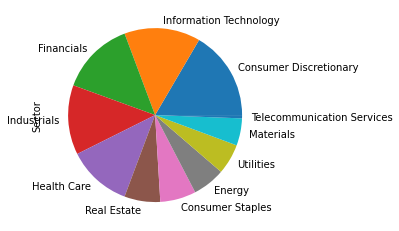

In [17]:
# Plot a pie chart for this market data

sp500_sector_count.plot(kind="pie")

<AxesSubplot:>

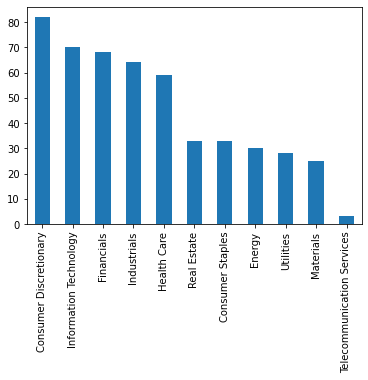

In [18]:
# Plot a bar chart for the same market data

sp500_sector_count.plot(kind="bar")

In [21]:
# Create a subset of dataframe for the top 20 companies by market cap

market_cap = sp500_df.loc[:,["Name","Market Cap"]]

market_cap

,Name,Market Cap
0,3M Company,138721055226
1,A.O. Smith Corp,10783419933
2,Abbott Laboratories,102121042306
3,AbbVie Inc.,181386347059
4,Accenture plc,98765855553
...,...,...
500,Xylem Inc.,12915021000
501,Yum! Brands Inc,27003303098
502,Zimmer Biomet Holdings,24454698119
503,Zions Bancorp,10670678640


In [24]:
# Set Name as the index for this subset dataframe

market_cap = market_cap.set_index("Name")

market_cap

,Market Cap
Name,
3M Company,138721055226
A.O. Smith Corp,10783419933
Abbott Laboratories,102121042306
AbbVie Inc.,181386347059
Accenture plc,98765855553
...,...
Xylem Inc.,12915021000
Yum! Brands Inc,27003303098
Zimmer Biomet Holdings,24454698119


In [28]:
# Sort out the 20 largest company by market cap

market_cap_arrange = market_cap.sort_values("Market Cap", ascending=False)

market_cap_arrange

,Market Cap
Name,
Apple Inc.,809508034020
Alphabet Inc Class A,733823966137
Alphabet Inc Class C,728535558140
Microsoft Corp.,689978437468
Amazon.com Inc,685873374731
...,...
Navient,3692691330
Range Resources Corp.,3255587970
Patterson Companies,3209792400


In [32]:
# Slice out the top 20 as subset dataframe

top_20_market_cap = market_cap_arrange.iloc[:20]

top_20_market_cap

,Market Cap
Name,
Apple Inc.,809508034020
Alphabet Inc Class A,733823966137
Alphabet Inc Class C,728535558140
Microsoft Corp.,689978437468
Amazon.com Inc,685873374731
"Facebook, Inc.",523423036576
JPMorgan Chase & Co.,386613611000
Johnson & Johnson,353062464971
Exxon Mobil Corp.,326148660000


<AxesSubplot:xlabel='Name'>

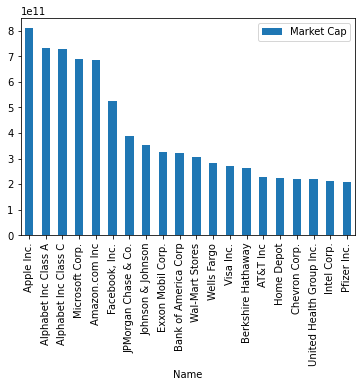

In [33]:
# Plot bar chart for top 20 market cap

top_20_market_cap.plot(kind="bar")

In [37]:
# Another function to find the top 20 largest by market cap

top_20_market_cap_alt = market_cap["Market Cap"].nlargest(20)

top_20_market_cap_alt

Name
Apple Inc.                  809508034020
Alphabet Inc Class A        733823966137
Alphabet Inc Class C        728535558140
Microsoft Corp.             689978437468
Amazon.com Inc              685873374731
Facebook, Inc.              523423036576
JPMorgan Chase & Co.        386613611000
Johnson & Johnson           353062464971
Exxon Mobil Corp.           326148660000
Bank of America Corp        321478200969
Wal-Mart Stores             304680931618
Wells Fargo                 281463620775
Visa Inc.                   270038723213
Berkshire Hathaway          261401203633
AT&T Inc                    226713270000
Home Depot                  223378633329
Chevron Corp.               218978820159
United Health Group Inc.    218834811333
Intel Corp.                 211536000000
Pfizer Inc.                 208505541949
Name: Market Cap, dtype: int64

<AxesSubplot:title={'center':'Top 20 Largest Companies by Market Cap'}, xlabel='Name'>

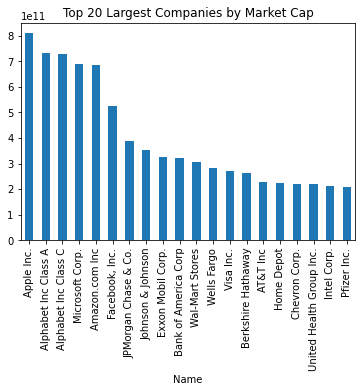

In [46]:
top_20_market_cap_alt.plot(kind="bar", title="Top 20 Largest Companies by Market Cap")

In [51]:
# Sub set for Price and Price/Earning ratio

ppe_df = sp500_df.loc[:,["Price","Price/Earnings"]]

ppe_df

,Price,Price/Earnings
0,222.89,24.31
1,60.24,27.76
2,56.27,22.51
3,108.48,19.41
4,150.51,25.47
...,...,...
500,70.24,30.94
501,76.30,27.25
502,115.53,14.32
503,50.71,17.73


<AxesSubplot:xlabel='Price/Earnings', ylabel='Price'>

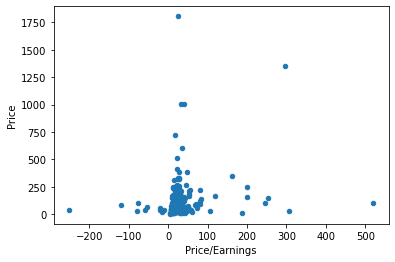

In [55]:
sp500_df.plot(kind="scatter", x="Price/Earnings", y="Price")

In [ ]:
"